# Importing libaries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Reading the dataset

In [3]:
data=pd.read_csv("diabetes_prediction_dataset.csv")
data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [4]:
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [5]:
data.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [6]:
data.gender.unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [7]:
data.gender.value_counts()

Female    58552
Male      41430
Other        18
Name: gender, dtype: int64

In [8]:
data.smoking_history.unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [9]:
data.smoking_history.value_counts()

No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: smoking_history, dtype: int64

In [10]:
data[['age','bmi','HbA1c_level', 'blood_glucose_level']].describe()

,age,bmi,HbA1c_level,blood_glucose_level
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,27.320767,5.527507,138.058060
std,22.516840,6.636783,1.070672,40.708136
min,0.080000,10.010000,3.500000,80.000000
25%,24.000000,23.630000,4.800000,100.000000
50%,43.000000,27.320000,5.800000,140.000000
75%,60.000000,29.580000,6.200000,159.000000
max,80.000000,95.690000,9.000000,300.000000


<Axes: xlabel='age'>

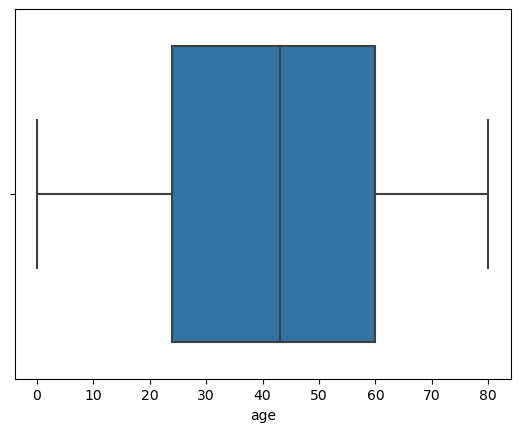

In [11]:
sns.boxplot(x=data.age)

<Axes: xlabel='bmi'>

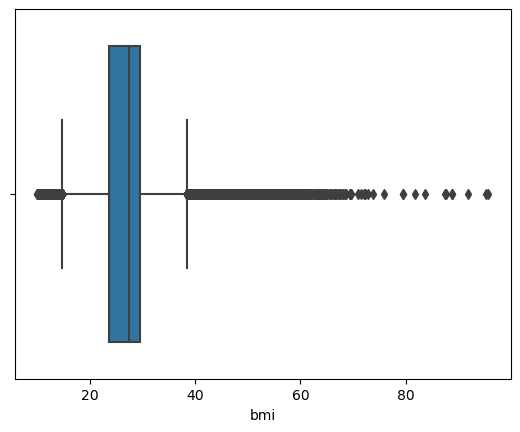

In [12]:
sns.boxplot(x=data.bmi)

<Axes: xlabel='HbA1c_level'>

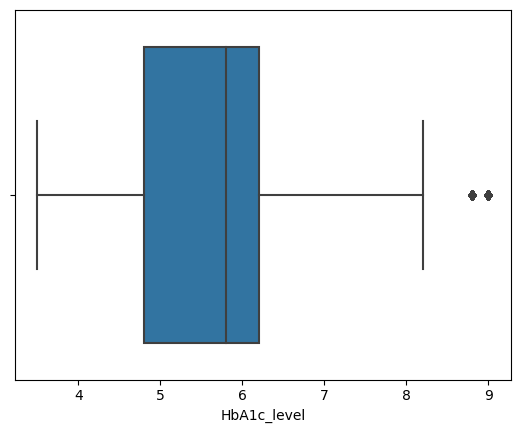

In [13]:
sns.boxplot(x=data.HbA1c_level)

<Axes: xlabel='blood_glucose_level'>

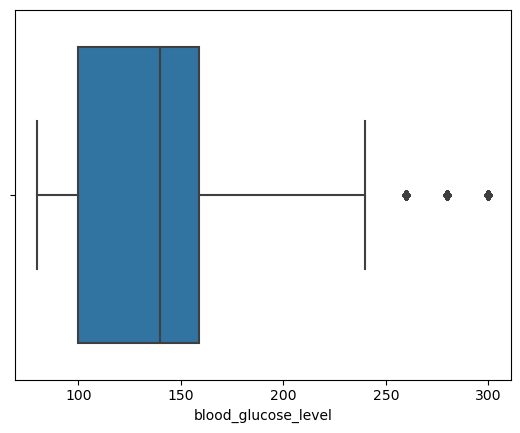

In [14]:
sns.boxplot(x=data.blood_glucose_level)

<Axes: >

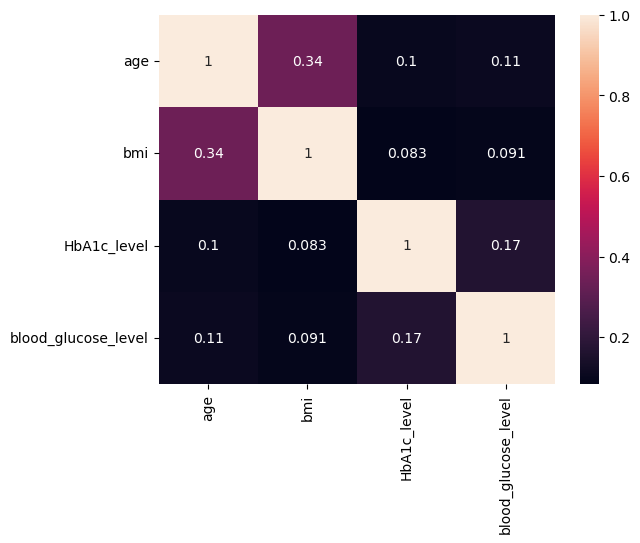

In [15]:
sns.heatmap(data[['age','bmi','HbA1c_level', 'blood_glucose_level']].corr(), annot=True)

# Data Preprocessing

In [16]:
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [17]:
data.duplicated().sum()

3854

In [18]:
data.drop_duplicates(inplace=True)

In [19]:
dummy_gender=pd.get_dummies(data.gender)
dummy_gender.drop('Other', axis=1, inplace=True)
dummy_gender

,Female,Male
0,1,0
1,1,0
2,0,1
3,1,0
4,0,1
...,...,...
99994,1,0
99996,1,0
99997,0,1
99998,1,0


In [20]:
data.drop('gender',axis=1,inplace=True)
data=pd.concat([data,dummy_gender],axis=1)

In [21]:
data.head()

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,Female,Male
0,80.0,0,1,never,25.19,6.6,140,0,1,0
1,54.0,0,0,No Info,27.32,6.6,80,0,1,0
2,28.0,0,0,never,27.32,5.7,158,0,0,1
3,36.0,0,0,current,23.45,5.0,155,0,1,0
4,76.0,1,1,current,20.14,4.8,155,0,0,1


In [22]:
dummy_smoking=pd.get_dummies(data.smoking_history)
dummy_smoking.drop('No Info', axis=1,inplace=True)
dummy_smoking

,current,ever,former,never,not current
0,0,0,0,1,0
1,0,0,0,0,0
2,0,0,0,1,0
3,1,0,0,0,0
4,1,0,0,0,0
...,...,...,...,...,...
99994,0,0,0,0,0
99996,0,0,0,0,0
99997,0,0,1,0,0
99998,0,0,0,1,0


In [23]:
data.drop('smoking_history',axis=1,inplace=True)
data=pd.concat([data,dummy_smoking],axis=1)

In [24]:
data.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,Female,Male,current,ever,former,never,not current
0,80.0,0,1,25.19,6.6,140,0,1,0,0,0,0,1,0
1,54.0,0,0,27.32,6.6,80,0,1,0,0,0,0,0,0
2,28.0,0,0,27.32,5.7,158,0,0,1,0,0,0,1,0
3,36.0,0,0,23.45,5.0,155,0,1,0,1,0,0,0,0
4,76.0,1,1,20.14,4.8,155,0,0,1,1,0,0,0,0


# Train-Test Split

In [25]:
X=data.drop('diabetes',axis=1)
y=data.diabetes

In [26]:
X.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,Female,Male,current,ever,former,never,not current
0,80.0,0,1,25.19,6.6,140,1,0,0,0,0,1,0
1,54.0,0,0,27.32,6.6,80,1,0,0,0,0,0,0
2,28.0,0,0,27.32,5.7,158,0,1,0,0,0,1,0
3,36.0,0,0,23.45,5.0,155,1,0,1,0,0,0,0
4,76.0,1,1,20.14,4.8,155,0,1,1,0,0,0,0


In [27]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: diabetes, dtype: int64

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

# Model Selection

In [29]:
from sklearn.metrics import classification_report, f1_score, accuracy_score, recall_score, precision_score, confusion_matrix
metric=pd.DataFrame({})

* ## Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
LR=LogisticRegression()

In [32]:
LR.fit(X_train,y_train)

LogisticRegression()

In [33]:
y_pred_test=LR.predict(X_test)
y_pred_train=LR.predict(X_train)

In [34]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98     21925
           1       0.86      0.62      0.72      2112

    accuracy                           0.96     24037
   macro avg       0.91      0.80      0.85     24037
weighted avg       0.95      0.96      0.95     24037



In [35]:
train_acc=accuracy_score(y_train,y_pred_train)
test_acc=accuracy_score(y_test,y_pred_test)
recal=recall_score(y_test,y_pred_test)
prec=precision_score(y_test,y_pred_test)
f1=f1_score(y_test,y_pred_test)
print("Training Accuracy :", train_acc)
print("Testing Accuracy :", test_acc)
print("F1 Score :", f1)
print("Recall :", recal)
print("Precision :", prec)

Training Accuracy : 0.958174430376236
Testing Accuracy : 0.9575654199775346
F1 Score : 0.7193175564116676
Recall : 0.618844696969697
Precision : 0.8587385019710907


In [36]:
metric["Logistic Regression"]={"Training_Accuracy":train_acc, "Testing Accuracy":test_acc, "f1 score":f1, "Recall":recal, "Precision":prec}

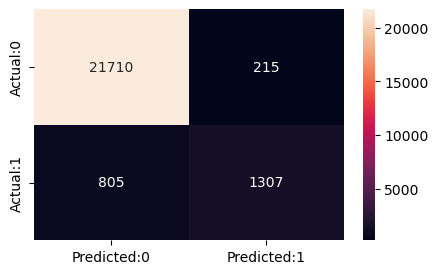

In [37]:
conf_matrix = pd.DataFrame(data = confusion_matrix(y_test,y_pred_test),
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (5, 3))
sns.heatmap(conf_matrix, annot = True, fmt = 'd')
plt.show()

* ## Support Vector Machine

In [38]:
from sklearn.svm import LinearSVC

In [39]:
sv=LinearSVC()

In [40]:
sv.fit(X_train,y_train)

LinearSVC()

In [41]:
y_pred_test=sv.predict(X_test)
y_pred_train=sv.predict(X_train)

In [42]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       1.00      0.76      0.86     21925
           1       0.28      0.96      0.43      2112

    accuracy                           0.78     24037
   macro avg       0.64      0.86      0.65     24037
weighted avg       0.93      0.78      0.82     24037



In [43]:
train_acc=accuracy_score(y_train,y_pred_train)
test_acc=accuracy_score(y_test,y_pred_test)
recal=recall_score(y_test,y_pred_test)
prec=precision_score(y_test,y_pred_test)
f1=f1_score(y_test,y_pred_test)
print("Training Accuracy :", train_acc)
print("Testing Accuracy :", test_acc)
print("F1 Score :", f1)
print("Recall :", recal)
print("Precision :", prec)

Training Accuracy : 0.7752985064277691
Testing Accuracy : 0.776386404293381
F1 Score : 0.4304334004450567
Recall : 0.9616477272727273
Precision : 0.27726962457337884


In [44]:
metric["Support Vector Machine"]={"Training_Accuracy":train_acc, "Testing Accuracy":test_acc, "f1 score":f1, "Recall":recal, "Precision":prec}

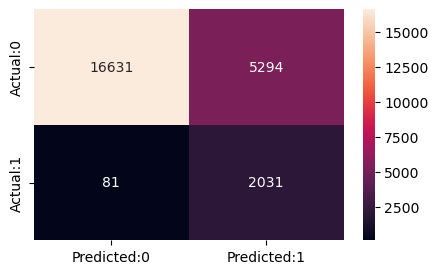

In [45]:
conf_matrix = pd.DataFrame(data = confusion_matrix(y_test,y_pred_test),
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (5, 3))
sns.heatmap(conf_matrix, annot = True, fmt = 'd')
plt.show()

* ## Navies Bayes

In [46]:
from sklearn.naive_bayes import GaussianNB

In [47]:
NB=GaussianNB()

In [48]:
NB.fit(X_train,y_train)

GaussianNB()

In [49]:
y_pred_test=NB.predict(X_test)
y_pred_train=NB.predict(X_train)

In [50]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95     21925
           1       0.46      0.65      0.54      2112

    accuracy                           0.90     24037
   macro avg       0.71      0.79      0.74     24037
weighted avg       0.92      0.90      0.91     24037



In [51]:
train_acc=accuracy_score(y_train,y_pred_train)
test_acc=accuracy_score(y_test,y_pred_test)
recal=recall_score(y_test,y_pred_test)
prec=precision_score(y_test,y_pred_test)
f1=f1_score(y_test,y_pred_test)
print("Training Accuracy :", train_acc)
print("Testing Accuracy :", test_acc)
print("F1 Score :", f1)
print("Recall :", recal)
print("Precision :", prec)

Training Accuracy : 0.9009554979267498
Testing Accuracy : 0.903315721595873
F1 Score : 0.53980198019802
Recall : 0.6453598484848485
Precision : 0.4639210347174949


In [52]:
metric["Gaussian Navies Bayes"]={"Training_Accuracy":train_acc, "Testing Accuracy":test_acc, "f1 score":f1, "Recall":recal, "Precision":prec}

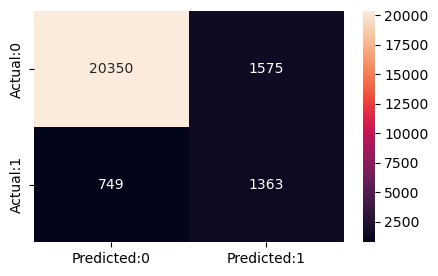

In [53]:
conf_matrix = pd.DataFrame(data = confusion_matrix(y_test,y_pred_test),
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (5, 3))
sns.heatmap(conf_matrix, annot = True, fmt = 'd')
plt.show()

* ## KNN

In [54]:
from sklearn.neighbors import KNeighborsClassifier

In [55]:
KNN=KNeighborsClassifier(n_neighbors=7)

In [56]:
KNN.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [57]:
y_pred_test=KNN.predict(X_test)
y_pred_train=KNN.predict(X_train)

In [58]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97     21925
           1       0.92      0.51      0.66      2112

    accuracy                           0.95     24037
   macro avg       0.94      0.75      0.82     24037
weighted avg       0.95      0.95      0.95     24037



In [59]:
train_acc=accuracy_score(y_train,y_pred_train)
test_acc=accuracy_score(y_test,y_pred_test)
recal=recall_score(y_test,y_pred_test)
prec=precision_score(y_test,y_pred_test)
f1=f1_score(y_test,y_pred_test)
print("Training Accuracy :", train_acc)
print("Testing Accuracy :", test_acc)
print("F1 Score :", f1)
print("Recall :", recal)
print("Precision :", prec)

Training Accuracy : 0.959755370342121
Testing Accuracy : 0.9530723467986854
F1 Score : 0.6575591985428051
Recall : 0.5127840909090909
Precision : 0.916243654822335


In [60]:
metric["KNN"]={"Training_Accuracy":train_acc, "Testing Accuracy":test_acc, "f1 score":f1, "Recall":recal, "Precision":prec}

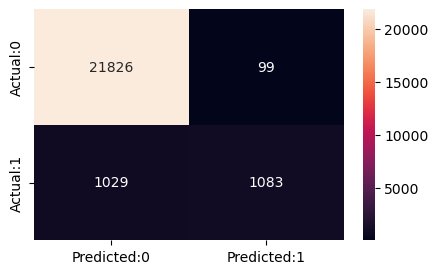

In [61]:
conf_matrix = pd.DataFrame(data = confusion_matrix(y_test,y_pred_test),
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (5, 3))
sns.heatmap(conf_matrix, annot = True, fmt = 'd')
plt.show()

* ## Decision Tree

In [62]:
from sklearn.tree import DecisionTreeClassifier

In [63]:
DT=DecisionTreeClassifier(criterion='entropy', max_features='log2')

In [64]:
DT.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_features='log2')

In [65]:
y_pred_test=DT.predict(X_test)
y_pred_train=DT.predict(X_train)

In [66]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     21925
           1       0.72      0.72      0.72      2112

    accuracy                           0.95     24037
   macro avg       0.85      0.85      0.85     24037
weighted avg       0.95      0.95      0.95     24037



In [67]:
train_acc=accuracy_score(y_train,y_pred_train)
test_acc=accuracy_score(y_test,y_pred_test)
recal=recall_score(y_test,y_pred_test)
prec=precision_score(y_test,y_pred_test)
f1=f1_score(y_test,y_pred_test)
print("Training Accuracy :", train_acc)
print("Testing Accuracy :", test_acc)
print("F1 Score :", f1)
print("Recall :", recal)
print("Precision :", prec)

Training Accuracy : 0.9993066052781207
Testing Accuracy : 0.950576195032658
F1 Score : 0.71875
Recall : 0.71875
Precision : 0.71875


In [68]:
metric["Decision Tree"]={"Training_Accuracy":train_acc, "Testing Accuracy":test_acc, "f1 score":f1, "Recall":recal, "Precision":prec}

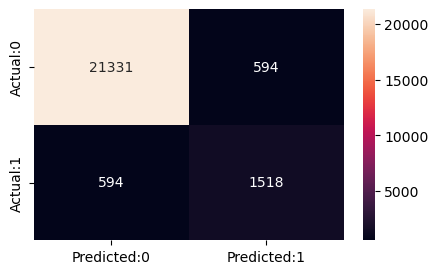

In [69]:
conf_matrix = pd.DataFrame(data = confusion_matrix(y_test,y_pred_test),
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (5, 3))
sns.heatmap(conf_matrix, annot = True, fmt = 'd')
plt.show()

* ## Random Forest

In [70]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
RF=RandomForestClassifier(criterion='entropy', max_features='log2', max_depth=6, max_leaf_nodes=9)

In [72]:
RF.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=6, max_features='log2',
                       max_leaf_nodes=9)

In [73]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     21925
           1       0.72      0.72      0.72      2112

    accuracy                           0.95     24037
   macro avg       0.85      0.85      0.85     24037
weighted avg       0.95      0.95      0.95     24037



In [74]:
y_pred_test=RF.predict(X_test)
y_pred_train=RF.predict(X_train)

In [75]:
train_acc=accuracy_score(y_train,y_pred_train)
test_acc=accuracy_score(y_test,y_pred_test)
recal=recall_score(y_test,y_pred_test)
prec=precision_score(y_test,y_pred_test)
f1=f1_score(y_test,y_pred_test)
print("Training Accuracy :", train_acc)
print("Testing Accuracy :", test_acc)
print("F1 Score :", f1)
print("Recall :", recal)
print("Precision :", prec)

Training Accuracy : 0.9711409116753803
Testing Accuracy : 0.9696301535133336
F1 Score : 0.7910704064109902
Recall : 0.6543560606060606
Precision : 1.0


In [76]:
metric["Random Forest"]={"Training_Accuracy":train_acc, "Testing Accuracy":test_acc, "f1 score":f1, "Recall":recal, "Precision":prec}

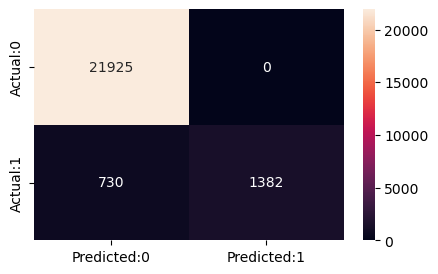

In [77]:
conf_matrix = pd.DataFrame(data = confusion_matrix(y_test,y_pred_test),
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (5, 3))
sns.heatmap(conf_matrix, annot = True, fmt = 'd')
plt.show()

* ## Gradient Boosting Classifier

In [78]:
from sklearn.ensemble import GradientBoostingClassifier

In [79]:
GB=GradientBoostingClassifier()

In [80]:
GB.fit(X_train,y_train)

GradientBoostingClassifier()

In [81]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     21925
           1       1.00      0.65      0.79      2112

    accuracy                           0.97     24037
   macro avg       0.98      0.83      0.89     24037
weighted avg       0.97      0.97      0.97     24037



In [82]:
y_pred_test=GB.predict(X_test)
y_pred_train=GB.predict(X_train)

In [83]:
train_acc=accuracy_score(y_train,y_pred_train)
test_acc=accuracy_score(y_test,y_pred_test)
recal=recall_score(y_test,y_pred_test)
prec=precision_score(y_test,y_pred_test)
f1=f1_score(y_test,y_pred_test)
print("Training Accuracy :", train_acc)
print("Testing Accuracy :", test_acc)
print("F1 Score :", f1)
print("Recall :", recal)
print("Precision :", prec)

Training Accuracy : 0.9716956274528838
Testing Accuracy : 0.9692973332778633
F1 Score : 0.7914075749010739
Recall : 0.6628787878787878
Precision : 0.9817671809256662


In [84]:
metric["Gradient Boosting Classifier"]={"Training_Accuracy":train_acc, "Testing Accuracy":test_acc, "f1 score":f1, "Recall":recal, "Precision":prec}

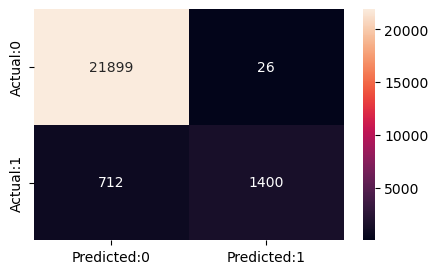

In [85]:
conf_matrix = pd.DataFrame(data = confusion_matrix(y_test,y_pred_test),
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (5, 3))
sns.heatmap(conf_matrix, annot = True, fmt = 'd')
plt.show()

* ## Stochastic Gradient Descent Classifier

In [86]:
from sklearn.linear_model import SGDClassifier

In [87]:
SGD=SGDClassifier()

In [88]:
SGD.fit(X_train,y_train)

SGDClassifier()

In [89]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     21925
           1       0.98      0.66      0.79      2112

    accuracy                           0.97     24037
   macro avg       0.98      0.83      0.89     24037
weighted avg       0.97      0.97      0.97     24037



In [90]:
y_pred_test=SGD.predict(X_test)
y_pred_train=SGD.predict(X_train)

In [91]:
train_acc=accuracy_score(y_train,y_pred_train)
test_acc=accuracy_score(y_test,y_pred_test)
recal=recall_score(y_test,y_pred_test)
prec=precision_score(y_test,y_pred_test)
f1=f1_score(y_test,y_pred_test)
print("Training Accuracy :", train_acc)
print("Testing Accuracy :", test_acc)
print("F1 Score :", f1)
print("Recall :", recal)
print("Precision :", prec)

Training Accuracy : 0.9572868851322304
Testing Accuracy : 0.9558597162707493
F1 Score : 0.6867434307646885
Recall : 0.5506628787878788
Precision : 0.912156862745098


In [92]:
metric["Stochastic Gradient Descent Classifier"]={"Training_Accuracy":train_acc, "Testing Accuracy":test_acc, "f1 score":f1, "Recall":recal, "Precision":prec}

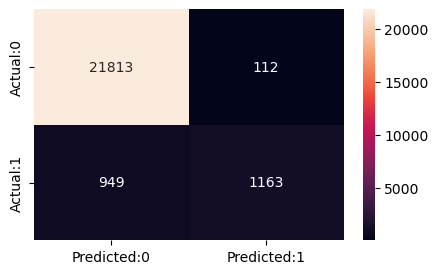

In [93]:
conf_matrix = pd.DataFrame(data = confusion_matrix(y_test,y_pred_test),
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (5, 3))
sns.heatmap(conf_matrix, annot = True, fmt = 'd')
plt.show()

* ## LGBM Classifier

In [94]:
from lightgbm import LGBMClassifier

In [95]:
LGBM=LGBMClassifier(boosting_type='dart')

In [96]:
LGBM.fit(X_train,y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 6370, number of negative: 65739
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002446 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 414
[LightGBM] [Info] Number of data points in the train set: 72109, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.088338 -> initscore=-2.334093
[LightGBM] [Info] Start training from score -2.334093


LGBMClassifier(boosting_type='dart')

In [97]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98     21925
           1       0.91      0.55      0.69      2112

    accuracy                           0.96     24037
   macro avg       0.94      0.77      0.83     24037
weighted avg       0.95      0.96      0.95     24037



In [98]:
y_pred_test=LGBM.predict(X_test)
y_pred_train=LGBM.predict(X_train)

In [99]:
train_acc=accuracy_score(y_train,y_pred_train)
test_acc=accuracy_score(y_test,y_pred_test)
recal=recall_score(y_test,y_pred_test)
prec=precision_score(y_test,y_pred_test)
f1=f1_score(y_test,y_pred_test)
print("Training Accuracy :", train_acc)
print("Testing Accuracy :", test_acc)
print("F1 Score :", f1)
print("Recall :", recal)
print("Precision :", prec)

Training Accuracy : 0.9724306258580759
Testing Accuracy : 0.9695053459250322
F1 Score : 0.7932299012693936
Recall : 0.665719696969697
Precision : 0.9811584089323099


In [100]:
metric["LGBM Classifier"]={"Training_Accuracy":train_acc, "Testing Accuracy":test_acc, "f1 score":f1, "Recall":recal, "Precision":prec}

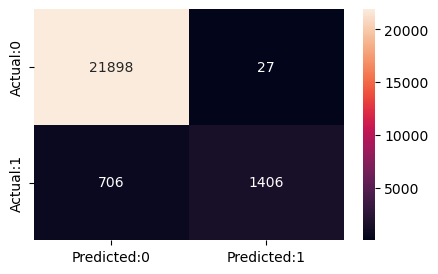

In [101]:
conf_matrix = pd.DataFrame(data = confusion_matrix(y_test,y_pred_test),
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (5, 3))
sns.heatmap(conf_matrix, annot = True, fmt = 'd')
plt.show()

* ## XGBoost Classifier

In [102]:
from xgboost.sklearn import XGBClassifier

In [103]:
XG=XGBClassifier()

In [104]:
XG.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [105]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     21925
           1       0.98      0.67      0.79      2112

    accuracy                           0.97     24037
   macro avg       0.97      0.83      0.89     24037
weighted avg       0.97      0.97      0.97     24037



In [106]:
y_pred_test=XG.predict(X_test)
y_pred_train=XG.predict(X_train)

In [107]:
train_acc=accuracy_score(y_train,y_pred_train)
test_acc=accuracy_score(y_test,y_pred_test)
recal=recall_score(y_test,y_pred_test)
prec=precision_score(y_test,y_pred_test)
f1=f1_score(y_test,y_pred_test)
print("Training Accuracy :", train_acc)
print("Testing Accuracy :", test_acc)
print("F1 Score :", f1)
print("Recall :", recal)
print("Precision :", prec)

Training Accuracy : 0.9757311847342218
Testing Accuracy : 0.969546948454466
F1 Score : 0.7979017117614577
Recall : 0.6841856060606061
Precision : 0.956953642384106


In [108]:
metric["XGBoost"]={"Training_Accuracy":train_acc, "Testing Accuracy":test_acc, "f1 score":f1, "Recall":recal, "Precision":prec}

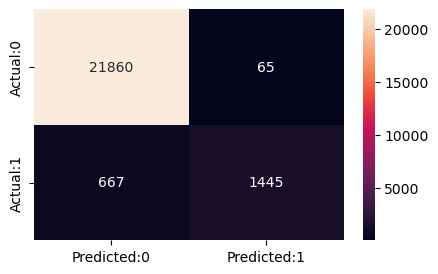

In [109]:
conf_matrix = pd.DataFrame(data = confusion_matrix(y_test,y_pred_test),
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (5, 3))
sns.heatmap(conf_matrix, annot = True, fmt = 'd')
plt.show()

* ## CatBoost

In [110]:
from catboost import CatBoostClassifier

In [111]:
CB=CatBoostClassifier()

In [112]:
CB.fit(X_train,y_train)

Learning rate set to 0.064017
0:	learn: 0.5425145	total: 163ms	remaining: 2m 42s
1:	learn: 0.4570471	total: 179ms	remaining: 1m 29s
2:	learn: 0.3832519	total: 195ms	remaining: 1m 4s
3:	learn: 0.3133882	total: 211ms	remaining: 52.4s
4:	learn: 0.2638991	total: 230ms	remaining: 45.7s
5:	learn: 0.2272761	total: 252ms	remaining: 41.7s
6:	learn: 0.1994655	total: 268ms	remaining: 38s
7:	learn: 0.1768080	total: 284ms	remaining: 35.3s
8:	learn: 0.1607484	total: 301ms	remaining: 33.2s
9:	learn: 0.1456046	total: 317ms	remaining: 31.4s
10:	learn: 0.1372004	total: 335ms	remaining: 30.1s
11:	learn: 0.1306603	total: 351ms	remaining: 28.9s
12:	learn: 0.1244295	total: 367ms	remaining: 27.9s
13:	learn: 0.1182517	total: 384ms	remaining: 27s
14:	learn: 0.1142669	total: 401ms	remaining: 26.4s
15:	learn: 0.1089364	total: 419ms	remaining: 25.8s
16:	learn: 0.1063977	total: 441ms	remaining: 25.5s
17:	learn: 0.1041273	total: 458ms	remaining: 25s
18:	learn: 0.1015915	total: 474ms	remaining: 24.5s
19:	learn: 0.09

In [113]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     21925
           1       0.96      0.68      0.80      2112

    accuracy                           0.97     24037
   macro avg       0.96      0.84      0.89     24037
weighted avg       0.97      0.97      0.97     24037



In [114]:
y_pred_test=CB.predict(X_test)
y_pred_train=CB.predict(X_train)

In [115]:
train_acc=accuracy_score(y_train,y_pred_train)
test_acc=accuracy_score(y_test,y_pred_test)
recal=recall_score(y_test,y_pred_test)
prec=precision_score(y_test,y_pred_test)
f1=f1_score(y_test,y_pred_test)
print("Training Accuracy :", train_acc)
print("Testing Accuracy :", test_acc)
print("F1 Score :", f1)
print("Recall :", recal)
print("Precision :", prec)

Training Accuracy : 0.9782967452051755
Testing Accuracy : 0.9690893206306943
F1 Score : 0.7950344827586207
Recall : 0.6822916666666666
Precision : 0.9524124256444151


In [116]:
metric["CatBoost"]={"Training_Accuracy":train_acc, "Testing Accuracy":test_acc, "f1 score":f1, "Recall":recal, "Precision":prec}

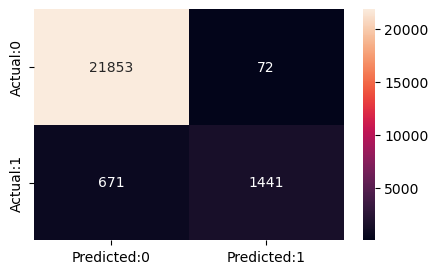

In [117]:
conf_matrix = pd.DataFrame(data = confusion_matrix(y_test,y_pred_test),
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (5, 3))
sns.heatmap(conf_matrix, annot = True, fmt = 'd')
plt.show()

* ## AdaBoost

In [118]:
from sklearn.ensemble import AdaBoostClassifier

In [119]:
AB=AdaBoostClassifier(algorithm='SAMME')

In [120]:
AB.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME')

In [121]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     21925
           1       0.95      0.68      0.80      2112

    accuracy                           0.97     24037
   macro avg       0.96      0.84      0.89     24037
weighted avg       0.97      0.97      0.97     24037



In [122]:
y_pred_test=AB.predict(X_test)
y_pred_train=AB.predict(X_train)

In [123]:
train_acc=accuracy_score(y_train,y_pred_train)
test_acc=accuracy_score(y_test,y_pred_test)
recal=recall_score(y_test,y_pred_test)
prec=precision_score(y_test,y_pred_test)
f1=f1_score(y_test,y_pred_test)
print("Training Accuracy :", train_acc)
print("Testing Accuracy :", test_acc)
print("F1 Score :", f1)
print("Recall :", recal)
print("Precision :", prec)

Training Accuracy : 0.9711409116753803
Testing Accuracy : 0.9696301535133336
F1 Score : 0.7910704064109902
Recall : 0.6543560606060606
Precision : 1.0


In [124]:
metric["AdaBoost"]={"Training_Accuracy":train_acc, "Testing Accuracy":test_acc, "f1 score":f1, "Recall":recal, "Precision":prec}

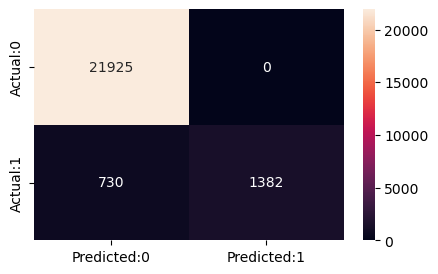

In [125]:
conf_matrix = pd.DataFrame(data = confusion_matrix(y_test,y_pred_test),
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (5, 3))
sns.heatmap(conf_matrix, annot = True, fmt = 'd')
plt.show()

# Conclusion

In [126]:
metric.T

,Training_Accuracy,Testing Accuracy,f1 score,Recall,Precision
Logistic Regression,0.958174,0.957565,0.719318,0.618845,0.858739
Support Vector Machine,0.775299,0.776386,0.430433,0.961648,0.277270
Gaussian Navies Bayes,0.900955,0.903316,0.539802,0.645360,0.463921
KNN,0.959755,0.953072,0.657559,0.512784,0.916244
Decision Tree,0.999307,0.950576,0.718750,0.718750,0.718750
Random Forest,0.971141,0.969630,0.791070,0.654356,1.000000
Gradient Boosting Classifier,0.971696,0.969297,0.791408,0.662879,0.981767
Stochastic Gradient Descent Classifier,0.957287,0.955860,0.686743,0.550663,0.912157
LGBM Classifier,0.972431,0.969505,0.793230,0.665720,0.981158
XGBoost,0.975731,0.969547,0.797902,0.684186,0.956954


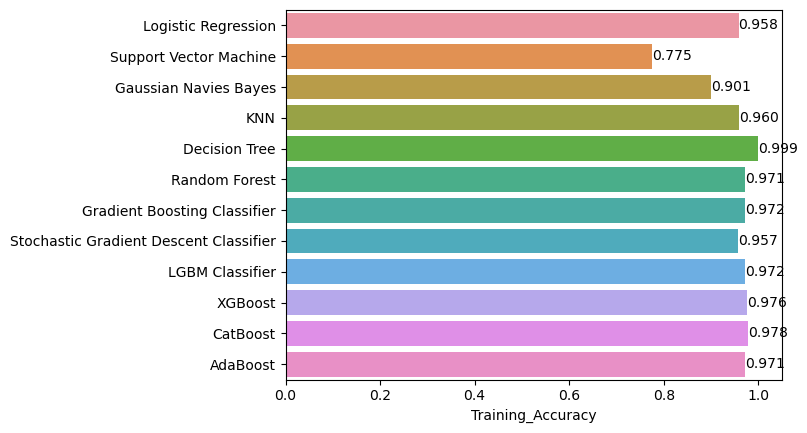

In [127]:
ax=sns.barplot(data=metric.T,y=metric.T.index,x='Training_Accuracy')
for i in ax.containers:
    ax.bar_label(i,fmt='%.03f')

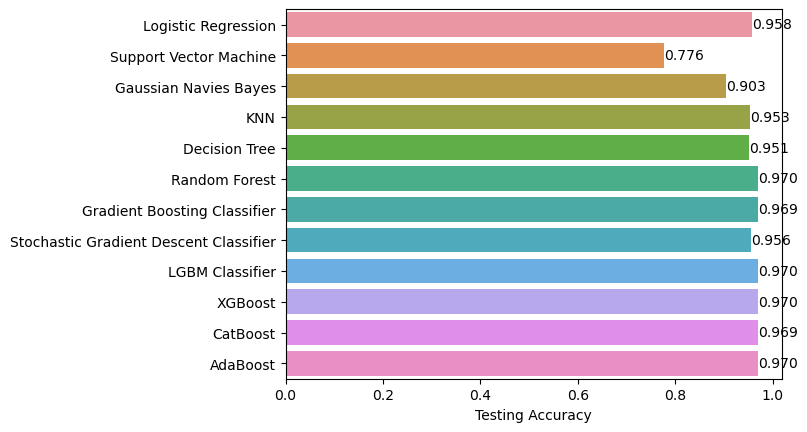

In [128]:
ax=sns.barplot(data=metric.T,y=metric.T.index,x='Testing Accuracy')
for i in ax.containers:
    ax.bar_label(i,fmt='%.03f')

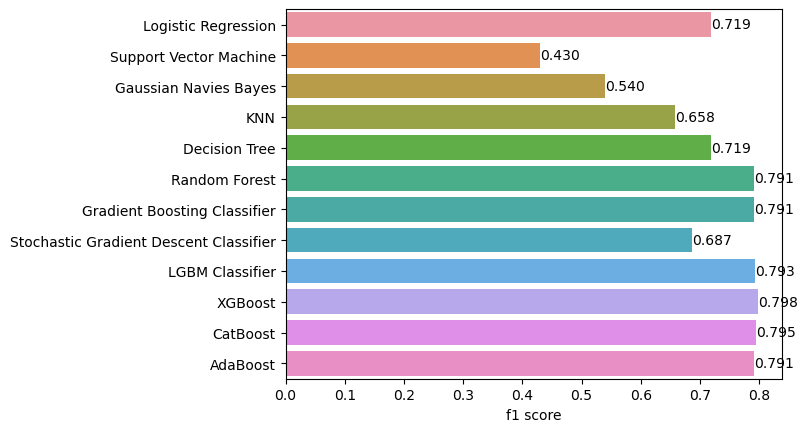

In [129]:
ax=sns.barplot(data=metric.T,y=metric.T.index,x='f1 score')
for i in ax.containers:
    ax.bar_label(i,fmt='%.03f')

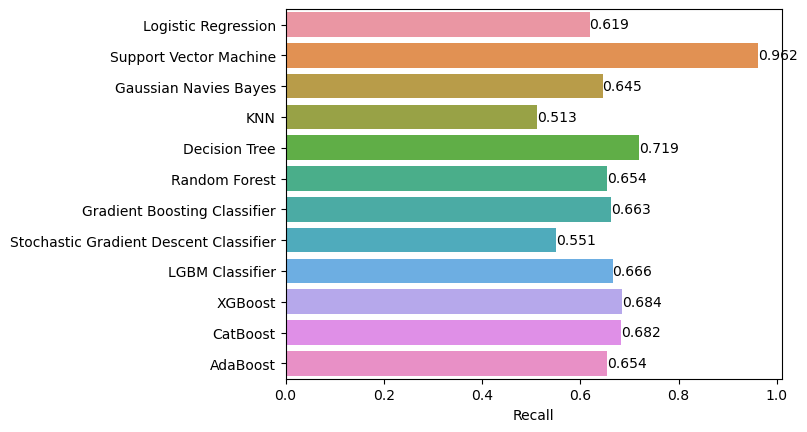

In [130]:
ax=sns.barplot(data=metric.T,y=metric.T.index,x='Recall')
for i in ax.containers:
    ax.bar_label(i,fmt='%.03f')

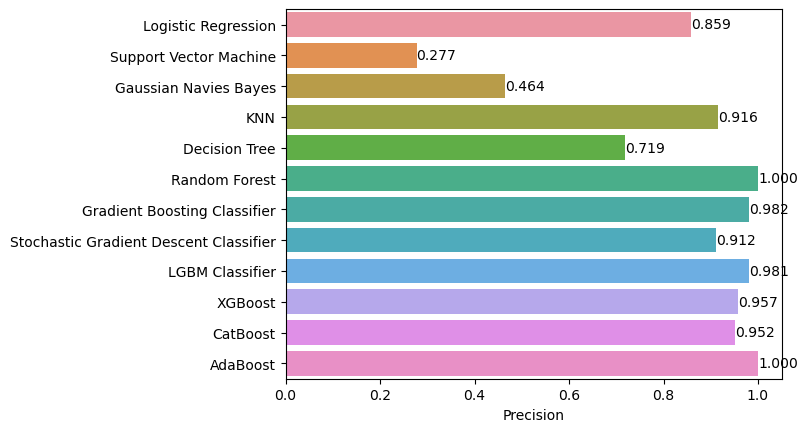

In [131]:
ax=sns.barplot(data=metric.T,y=metric.T.index,x='Precision')
for i in ax.containers:
    ax.bar_label(i,fmt='%.03f')

# Final Model Preparation

In [132]:
AB.fit(X,y)

AdaBoostClassifier(algorithm='SAMME')

In [133]:
#import pickle

#pickle.dump(AB, open("model.dat", "wb"))

In [135]:
import joblib

joblib.dump(AB, "model.dat")

['model.dat']